## Exploratory Data Analysis on Electric Utilities

In [1]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# LOADING THE DATA

data = pd.read_csv('C:\\Users\\Sharon\\HAMOYE\\fuel_ferc1.csv')
data.sample(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
25632,f1_fuel_2015_12_22_0_1,22,2015,teche,gas,mcf,1167807.0,1.037462,2.892,2.892,2.787
4976,f1_fuel_1998_12_127_1_1,127,1998,cardinal-opco share,coal,ton,1722558.0,24.428000,46.750,42.480,1.914
17005,f1_fuel_2008_12_210_2_11,210,2008,greater dm energy,gas,mcf,7710786.0,1.018188,8.907,8.907,8.748
13546,f1_fuel_2005_12_177_3_4,177,2005,pickneyville,gas,mcf,1323500.0,1.030000,9.370,9.370,9.100
9972,f1_fuel_2002_12_186_2_1,186,2002,chesapeake,oil,bbl,1659.0,5.880000,34.573,36.140,5.880


In [3]:
data.shape

(29523, 11)

> **DATA CLEANING**

In [4]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
x = data[['fuel_type_code_pudl', 'fuel_unit']]
x.sample(3)

,fuel_type_code_pudl,fuel_unit
28445,gas,mcf
1946,gas,mcf
23998,coal,ton


In [6]:
x.fuel_type_code_pudl.value_counts() 

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [7]:
# SHOWING THE MAPPING BETWEEN FUEL TYPES AND UNITS

x.set_index('fuel_type_code_pudl', inplace = True)
x = x.to_dict()
x

{'fuel_unit': {'coal': 'ton',
  'gas': 'mcf',
  'nuclear': 'gramsU',
  'oil': 'bbl',
  'waste': 'ton',
  'other': nan}}

In [8]:
data = data.dropna()
data = data.drop_duplicates()

>**STATISTICAL APPROACH**

In [9]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343.000000,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,118.507037,2005.819105,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,74.241226,7.019855,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2006.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,176.000000,2012.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


> From the summary statistics of the data, it tells that there is most likely the occurance of outliers as the Mean and Median(50%) values in some columns are out ranged. Some of these columns are: `fuel_qty_burned`, `fuel_cost_per_unit_burned`, `fuel_cost_per_unit_delivered`, `fuel_cost_per_mmbtu`, `fuel_lost_per_unit` and `energy emitted`

> Therefore, the data will be transformed using a standard deviation of 1, to reduce the extreme values. However, these data samples are based on the information gathered on each fuel type used by different electric utilities. It was also discovered that each of the fuel types, have various measuring units. In this case, to aviod being misled, the data transform will be done individully per fuel type with their respective units.

In [11]:
scale = data.set_index('fuel_type_code_pudl')
scale.sample()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
gas,f1_fuel_2018_12_166_0_1,166,2018,jones gas,mcf,8549839.0,1.048,2.46,2.45,2.34


In [12]:
# COAL FUEL TYPE

scale_coal = scale.loc['coal']
scale_coal.sample(3)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1999_12_62_0_10,62,1999,daniel,ton,1477499.0,20.400,31.088,30.913,1.5240
coal,f1_fuel_1996_12_186_0_7,186,1996,mount storm,ton,4378753.0,24.532,31.207,28.670,1.2720
coal,f1_fuel_1996_12_30_0_11,30,1996,bruce mansfield,ton,1272554.0,24.038,39.760,39.970,1.6541


In [13]:
scale_coal.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl         1
mcf         5
mmbtu      52
ton      8438
Name: fuel_unit, dtype: int64

In [35]:
# This step was applied to the 'ton' and 'mmbtu' fuel units because of their value counts

a = scale_coal[scale_coal['fuel_unit']=='ton']
a.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,8438.000000,8438.000000,8.315000e+03,4912.000000,8424.000000,8431.000000,6476.000000
mean,115.970609,2004.655961,1.511918e+06,20.603478,37.613729,36.752172,1.612368
std,72.995507,7.137471,1.542832e+06,2.562410,19.737585,65.214306,0.423085
min,1.000000,1994.000000,3.000000e+00,17.204000,0.000000,-40.725000,0.986000
25%,51.000000,1998.000000,4.502050e+05,17.810000,24.100750,21.879000,1.256000
50%,122.000000,2004.000000,9.779880e+05,20.715000,33.440000,31.570000,1.545000
75%,175.000000,2011.000000,1.998981e+06,23.036500,44.674750,43.500000,1.902000
max,514.000000,2018.000000,8.637637e+06,24.324000,168.819000,3048.700000,2.588000


In [27]:
# The rescaling is done on the columns that seemed to have outliers

warnings.filterwarnings('ignore')

ton = a[['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered']]
ton = ton[~(np.abs(ton - ton.mean()) > (1 * ton.std()))]
      
a.drop(['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned',\
        'fuel_cost_per_unit_delivered'], axis=1, inplace=True)
ton = pd.concat([a, ton], axis=1)

In [36]:
# Replace the values with the new scaled values

scale_coal[scale_coal['fuel_unit']=='ton'] = ton

In [30]:
scale_coal.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,NaN,18.59,18.53,1.121
coal,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,ton,NaN,NaN,18.58,18.53,1.120
coal,f1_fuel_1994_12_2_0_1,2,1994,gorgas,ton,2978683.0,24.130,39.72,38.12,1.650
coal,f1_fuel_1994_12_2_0_7,2,1994,barry,ton,3739484.0,23.950,47.21,45.99,1.970
coal,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,ton,2124933.0,23.922,44.24,43.25,1.850


In [42]:
# GAS FUEL TYPE

scale_gas = scale.loc['gas']
scale_gas.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl          2
mcf      11333
mmbtu       94
ton          4
Name: fuel_unit, dtype: int64

In [45]:
# This step was applied to 'mmbtu' and 'mcf'

a = scale_gas[scale_gas['fuel_unit']=='mmbtu']
a.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000
mean,129.531915,2009.042553,1.488881e+06,1.002436,115.446628,114.924947,3.877223
std,61.744827,8.092097,3.136670e+06,0.008905,1081.561178,1081.616174,1.965520
min,58.000000,1994.000000,2.630000e+02,1.000000,1.550000,0.000000,1.705000
25%,122.000000,2001.000000,7.327000e+03,1.000000,2.615000,2.234750,2.622500
50%,122.000000,2012.000000,3.301800e+04,1.000000,3.285000,3.025000,3.265500
75%,122.000000,2016.000000,1.741326e+06,1.000000,4.655750,4.234250,4.292500
max,294.000000,2018.000000,1.596252e+07,1.052000,10490.000000,10490.000000,10.864000


In [46]:
mmbtu = a[['fuel_qty_burned','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered']]
mmbtu = mmbtu[~(np.abs(mmbtu - mmbtu.mean()) > (1 * mmbtu.std()))]
      
a.drop(['fuel_qty_burned','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered'], axis=1, inplace=True)
mmbtu = pd.concat([a, mmbtu], axis=1)

# mcf = a[['fuel_qty_burned','fuel_cost_per_unit_burned']]
# mcf = mcf[~(np.abs(mcf - mcf.mean()) > (1 * mcf.std()))]
      
# a.drop(['fuel_qty_burned','fuel_cost_per_unit_burned'], axis=1, inplace=True)
# mcf = pd.concat([a, mcf], axis=1)

In [47]:
scale_gas[scale_gas['fuel_unit']=='mmbtu'] = mmbtu
scale_gas[scale_gas['fuel_unit']=='mcf'] = mcf

In [ ]:
scale_gas.head()

In [48]:
# NUCLEAR DATA TYPE

scale_nuclear = scale.loc['nuclear']

scale_nuclear.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
gramsU    464
kgU       110
mmbtu      34
mwdth      95
mwhth     100
Name: fuel_unit, dtype: int64

In [59]:
# This step was applied to all the units found in nuclear because it didn't seem to have a particular measuring unit.

a = scale_nuclear[scale_nuclear['fuel_unit']=='mwhth']
a.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.0,100.000000
mean,111.800000,2006.400000,2.892479e+07,6.794154,5.287160,0.0,1.529200
std,116.334592,7.178813,9.114356e+06,33.784562,31.789386,0.0,9.317731
min,8.000000,1994.000000,2.508944e+06,3.124600,1.319000,0.0,0.045000
25%,63.000000,2000.000000,2.385735e+07,3.412600,1.652250,0.0,0.479500
50%,87.000000,2006.500000,2.756158e+07,3.412600,1.878000,0.0,0.540000
75%,169.000000,2013.000000,3.253201e+07,3.412600,2.599500,0.0,0.756500
max,454.000000,2018.000000,4.683256e+07,341.260000,319.950000,0.0,93.756000


In [60]:
mwhth = a[['fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_cost_per_mmbtu']]
mwhth = mwhth[~(np.abs(mwhth - mwhth.mean()) > (1 * mwhth.std()))]
      
a.drop(['fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_cost_per_mmbtu'], axis=1, inplace=True)
mwhth = pd.concat([a, mwhth], axis=1)


In [61]:
# grams, kg, mmbtu, mwdth, mwhth 
scale_nuclear[scale_nuclear['fuel_unit']=='gramsU'] = grams
scale_nuclear[scale_nuclear['fuel_unit']=='kgU'] = kg
scale_nuclear[scale_nuclear['fuel_unit']=='mmbtu'] = mmbtu
scale_nuclear[scale_nuclear['fuel_unit']=='mwdth'] = mwdth
scale_nuclear[scale_nuclear['fuel_unit']=='mwhth'] = mwhth


In [ ]:
scale_nuclear.head()

In [62]:
# OIL DATA TYPE

scale_oil = scale.loc['oil']
scale_oil.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl    7952
gal      81
mcf       7
ton       3
Name: fuel_unit, dtype: int64

In [66]:
# This step was applied to 'bbl' and 'gal'

a = scale_oil[scale_oil['fuel_unit']=='bbl']
a.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,7952.000000,7952.000000,7.952000e+03,7952.000000,7952.000000,7952.000000,7952.000000
mean,113.210387,2007.183350,5.864813e+04,5.815249,170.895524,317.959943,12.701283
std,76.170939,6.148261,6.506814e+05,0.205505,2422.918898,9078.919965,6.216969
min,1.000000,1994.000000,1.000000e+00,3.103044,0.000000,-874.937000,5.000000
25%,45.000000,2003.000000,1.139500e+03,5.762684,37.961500,32.655250,6.658000
50%,120.000000,2007.000000,4.820500e+03,5.813262,69.725500,59.360000,12.163500
75%,173.000000,2012.000000,1.738475e+04,5.880000,99.114250,96.034500,17.207750
max,514.000000,2018.000000,4.646015e+07,6.812190,139358.000000,730166.000000,33.000000


In [67]:
bbl = a[['fuel_qty_burned','fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered']]
bbl = bbl[~(np.abs(bbl - bbl.mean()) > (1 * bbl.std()))]
      
a.drop(['fuel_qty_burned','fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered'], axis=1, inplace=True)
bbl = pd.concat([a, bbl], axis=1)

In [68]:
scale_oil[scale_oil['fuel_unit']=='gal'] = gal
scale_oil[scale_oil['fuel_unit']=='bbl'] = bbl

In [ ]:
scale_oil.head()

In [69]:
# WASTE DATA TYPE

scale_waste = scale.loc['waste']
scale_waste.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl      1
ton    436
Name: fuel_unit, dtype: int64

In [70]:
a = scale_waste[scale_waste['fuel_unit']=='ton']
a.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,155.055046,2005.763761,118393.091743,0.343774,19.683858,18.576528,832.138156
std,52.816026,7.426369,178453.632325,1.655533,30.117690,28.084739,17205.979577
min,9.000000,1994.000000,7.000000,0.000009,-276.080000,-174.670000,-41.501000
25%,121.000000,1999.000000,3110.750000,0.005503,11.069750,8.178000,0.699500
50%,186.000000,2006.000000,16073.000000,0.012309,22.918500,22.023000,1.147000
75%,194.000000,2012.000000,188619.000000,0.015000,32.926250,31.670000,2.233000
max,432.000000,2018.000000,799499.000000,8.700000,132.291000,121.020000,359278.000000


In [71]:
waste_ton = a[['fuel_qty_burned','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered']]
waste_ton = waste_ton[~(np.abs(waste_ton - waste_ton.mean()) > (1 * waste_ton.std()))]

to_drop = ['fuel_qty_burned','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered']
a.drop(to_drop, axis=1, inplace=True)
waste_ton = pd.concat([a, waste_ton], axis=1)


In [72]:
scale_waste[scale_waste['fuel_unit']=='ton'] = waste_ton

In [ ]:
scale_waste.head()

The rows containing `other` in the `fuel_type_code_pudl` column will be dropped because:
- The mean and median values are too far apart
- Also, the  fuel units are similar to that of the previous five fuel types, so we will rather draw insights from them
- Lastly the sample size is very small

In [73]:
to_drop=['other']
scale.drop(to_drop, axis=0, inplace=True)
scale.index.unique()

Index(['coal', 'gas', 'nuclear', 'oil', 'waste'], dtype='object', name='fuel_type_code_pudl')

In [74]:
scale.loc['coal'] = scale_coal
scale.loc['gas'] = scale_gas
scale.loc['nuclear'] = scale_nuclear
scale.loc['oil'] = scale_oil
scale.loc['waste'] = scale_waste

In [75]:
scale.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29212.000000,29212.000000,2.783700e+04,25582.000000,28943.000000,29074.000000,27218.000000
mean,118.563399,2005.842667,1.310615e+06,6.464669,169.536049,40.335158,19.753759
std,74.334964,7.018232,3.208562e+06,7.968860,2499.499132,203.946935,2177.700018
min,1.000000,1994.000000,1.000000e+00,0.000001,-7.700000,-874.937000,-41.501000
25%,55.000000,2000.000000,1.226000e+04,1.021000,5.210000,3.799250,2.030000
50%,122.000000,2006.000000,2.012790e+05,5.576424,25.825000,17.445000,4.582500
75%,176.000000,2012.000000,1.182377e+06,5.880000,46.340500,42.014250,8.229750
max,514.000000,2018.000000,5.003856e+07,66.100389,69785.215000,10451.000000,359278.000000


In [76]:
scale.isnull().sum()

record_id                          0
utility_id_ferc1                   0
report_year                        0
plant_name_ferc1                   0
fuel_unit                          0
fuel_qty_burned                 1375
fuel_mmbtu_per_unit             3630
fuel_cost_per_unit_burned        269
fuel_cost_per_unit_delivered     138
fuel_cost_per_mmbtu             1994
dtype: int64

In [ ]:
scale = scale.fillna(scale.mean())

In [91]:
scale.isnull().sum()

utility_id_ferc1                0
report_year                     0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
fuel_lost_per_unit              0
energy emitted                  0
dtype: int64

In [90]:
scale.shape

(29212, 10)

In [97]:
data = scale

to_drop = ['record_id', 'plant_name_ferc1']
data.drop(to_drop, axis=1, inplace=True)

In [150]:
# CREATING NEW COLUMNS THAT COULD BE NECESSARY FOR ANALYSIS

data['fuel_lost_per_unit'] = data['fuel_cost_per_unit_burned'] - data['fuel_cost_per_unit_delivered']
data['fuel_price'] = data['fuel_qty_burned'] * data['fuel_cost_per_unit_burned']
data['energy generated'] = data['fuel_mmbtu_per_unit'] * data['fuel_qty_burned']

data.head()

,fuel_type_code_pudl,utility_id_ferc1,report_year,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fuel_lost_per_unit,fuel_price,energy generated
0,coal,1,1994,ton,5.377489e+06,6.464669,18.59,18.53,1.121,0.06,9.996752e+07,3.476369e+07
1,coal,1,1994,ton,1.310615e+06,6.464669,18.58,18.53,1.120,0.05,2.435122e+07,8.472690e+06
2,coal,2,1994,ton,2.978683e+06,24.130000,39.72,38.12,1.650,1.60,1.183133e+08,7.187562e+07
3,coal,2,1994,ton,3.739484e+06,23.950000,47.21,45.99,1.970,1.22,1.765410e+08,8.956064e+07
4,gas,2,1994,mcf,4.053300e+04,1.000000,2.77,2.77,2.570,0.00,1.122764e+05,4.053300e+04


In [158]:
data.shape

(29212, 12)

In [105]:
# data = data.reset_index()
# data.to_csv('C:\\Users\\Sharon\\HAMOYE\\cleaned_fuel_ferc1.csv')

> **DATA VISUALIZATIONS** 

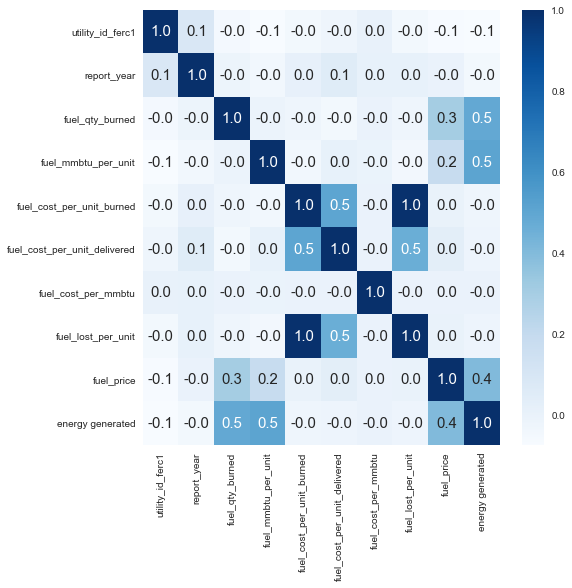

In [151]:
# PLOTTING A CORRELATION MATRIX

corr = data.corr()
corr.shape
plt.rcParams['figure.figsize']=(8,8)
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

(0, 11017.33612966215)

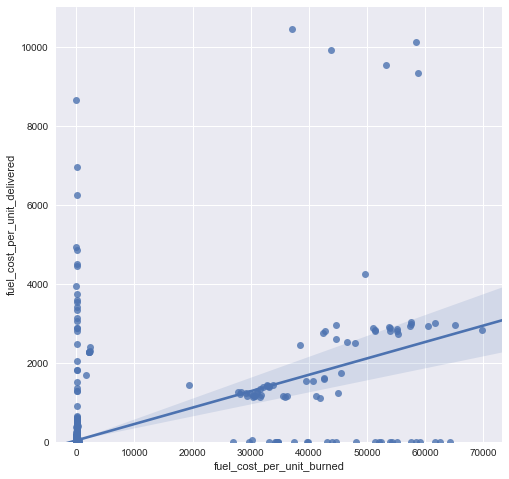

In [118]:
sns.regplot(x=data['fuel_cost_per_unit_burned'], y=data['fuel_cost_per_unit_delivered'])
plt.ylim(0,)

- Fig. 1 _Correlation between cost of fuel burned and cost of fuel delivered_ 

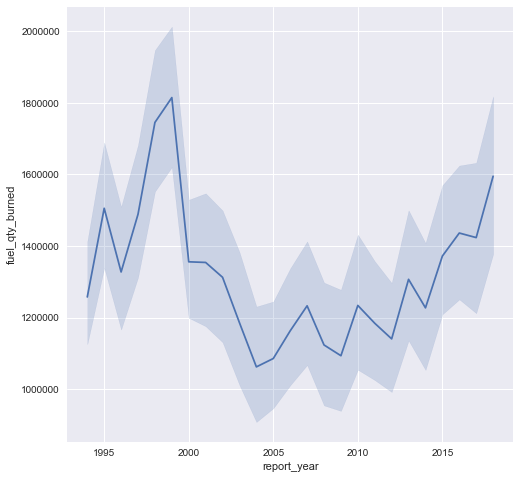

In [126]:
ax= sns.lineplot(x='report_year', y='fuel_qty_burned', data=data)

- Fig. 2 _Quantity of fuel burned over the years_

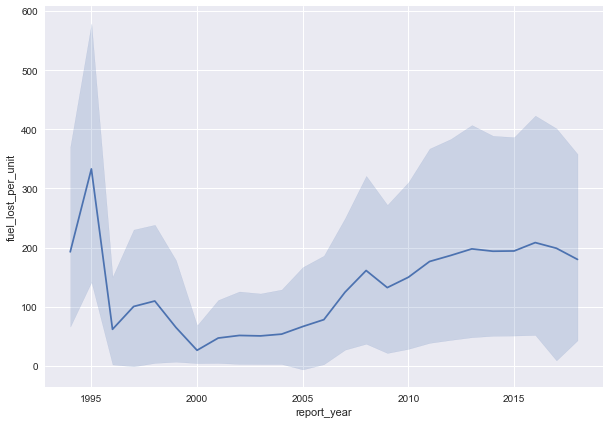

In [162]:
plt.rcParams['figure.figsize']=(10,7)
ax= sns.lineplot(x='report_year', y='fuel_lost_per_unit', data=data)

- Fig. 3 _Per unit cost of fuel lost from the difference in cost of fuel burned and cost of fuel delivered_ 

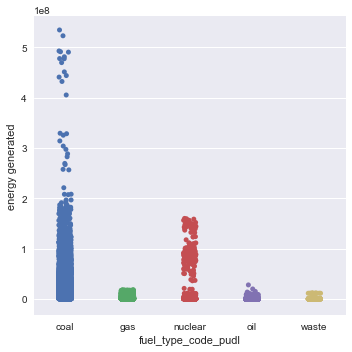

In [152]:
sns.catplot(x = "fuel_type_code_pudl", y = "energy generated", data=data)

- Fig. 4 _Amount of energy generated by the fuel types_

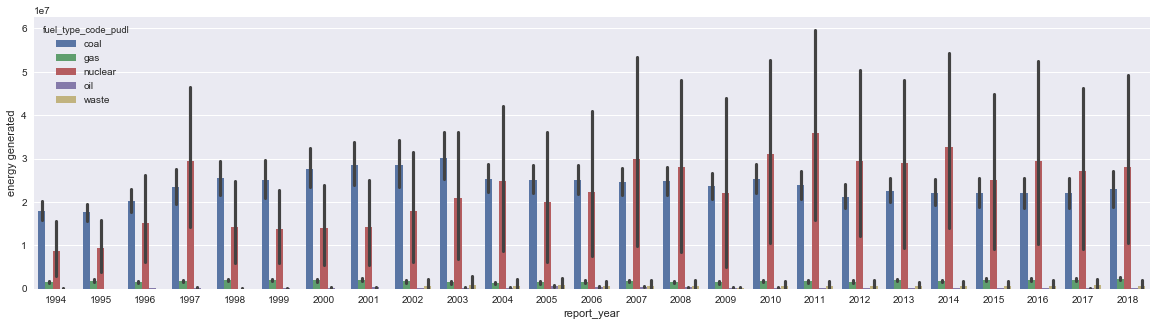

In [156]:
plt.rcParams['figure.figsize']=(20,5)
ax = sns.barplot(x="report_year", y="energy generated", hue="fuel_type_code_pudl",
                   data=data, dodge=True)

- Fig. 5 _Electrical energy generation across different years for each fuel type_

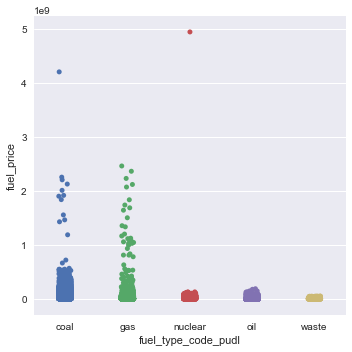

In [155]:
sns.catplot(x = "fuel_type_code_pudl", y = "fuel_price", data=data)

- Fig. 6 _Cost effectiveness of the different fuel types_

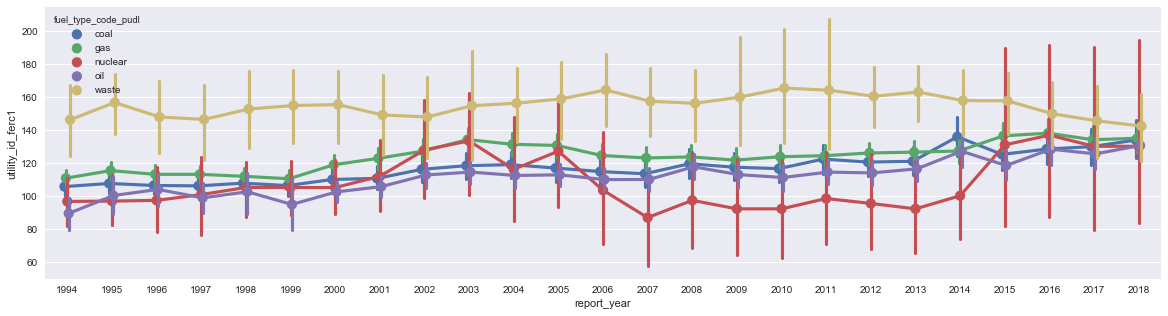

In [157]:
plt.rcParams['figure.figsize']=(20,5)
ax = sns.pointplot(x="report_year", y="utility_id_ferc1", hue="fuel_type_code_pudl", data=data, dodge=True)

- Fig. 7 _Trends of fuel types usage across different electric utilities over the years_

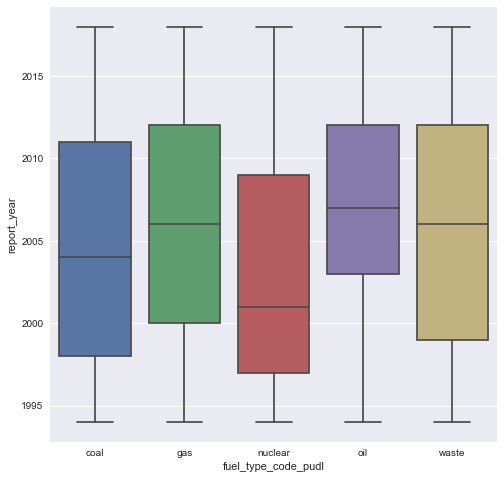

In [154]:
sns.boxplot(x = data['fuel_type_code_pudl'], y=data['report_year'])

- Fig. 8 _Comparing different fuel types usage over the years._

>**ANALYSIS SUMMARY**

Figure 1 displays a positive correlation between the cost of fuel burned and the cost of fuel delivered. Inferring most likely that, the higher the cost spent on fuel, the higher the electric bill. 
The cost of fuel per its unit, affects the total cost of fuel burned. Therefore, it could be a concern to electric utilities to provide electricity, yet with less cost as in Fig 2 where the recent rise in the demand of electricity is reflected on the quantity of fuel burned. However, over the years there has been a cost difference between the fuel burned and the fuel delivered, where the highest loss was in the 1995 era, while 2010 to 2018 have had a stable amount of fuel lost (Fig. 3).

From the information gathered in the datasets, the fuel types used are: `coal`, `gas`, `oil`, `waste` and `nuclear`, where the latter is a non-fossil fuel unlike the others. Fossil fuels are well known to emit greenhouses gases, which pose as a threat to the atmosphere. That is why, when generating electricity, electric utilities produce so much of these gases. As much as there is need for electricity, it will be more accomodating if there were to be fuel types in use that emit little to no greenhouse gas when burning.

In light of this, comparing between nuclear and other fuel types, as seen in Figure 4, `coal` and `nuclear` have a similar ability to generate electrical energy. Also, Figure 6, revealed the cost spent on the amount of fuel burned. It showed that the most economical are `nuclear`, `oil` and `waste`; drawing to a fact that nuclear is cheaper than coal and can generate good amount of energy too. 

When checking the frequency of these fuel types in use by electric utilities over the years (Fig. 8), nuclear was predominant just around the early 2000s, while fossil fuels seemed to be more embraced in recent years. But studying the trends shown in Figure 7, despite the fall in the use of `nuclear` between 2006 - 2014 by different utilities, there has been however, a rise again from 2015 onwards. On the other hand, natural `gas` and `coal` have been highly patronized, having the former and `waste` as the most used fuel types in the electricity generating sector over the years.

Conclusively, to curb the threat of global warming, there should be an increase in the use of non-fossil sources of energy, as they are non-emitting when generating electricity.